# Lending Club Case Study
> overall approach to the analysis done on the data to understand driving factors behind Loan Default

>* Group Members : Anjali Vashisth & Vishnu Vardhan Reddy


## Assignment Brief:
>You work for a consumer finance company Lending Club which specialises in lending various types of loans to urban customers. This company is the largest online loan >marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online >interface. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. When a person applies for a >loan, there are two types of decisions that could be taken by the company:

>- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
>  - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
>  - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
>  - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

>- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


<!-- You don't have to answer all the questions - just the ones relevant to your project. -->

## Business Objectives:
>Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

>Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

>In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

Exploratory Data Analysis:
======================

Data
------

The Loan Data available to us from the case is from 2007 - 2011 along with the discription to each variable in data dictionary.

Aim
------

We here aim to use only those variables or derived variables for analysis with an investor mindset to deduce which customer is defaulty and which is not.


### Let's start with importing all the required libraries for the analysis.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [6]:
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')

>Reading the loan data file.

In [7]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [8]:
loan.shape

(39717, 111)

In [10]:
loan.describe().head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,683131.913060,850463.559408,11219.443815,10947.713196,10397.448868,324.561922,68968.926377,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,210694.132915,265678.307421,7456.670694,7187.238670,7128.450439,208.874874,63793.765790,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,54734.000000,70699.000000,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,516221.000000,666780.000000,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

#### Droping Nulls
>Missing values per column expressed as % of total number of values

In [11]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

>There are many columns in the data with 100% missing values. Lets remove all the columns with more than 50% missing values.

In [12]:
columns_with_missing_values = list(missing[missing >= 50].index)
len(columns_with_missing_values)

57

>There are **57 columns** with more than 50% values as missing!  As they created noise without any use so we will deduct them.

In [13]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

>54 columns remain... Let's reduce the other columns with null values

In [15]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [21]:
#since desc has 32% still, let's have a look at its values
loan[['desc', 'purpose', 'title']].head()

,desc,purpose,title
0,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer
1,Borrower added on 12/22/11 > I plan to use t...,car,bike
2,NaN,small_business,real estate business
3,Borrower added on 12/21/11 > to pay for prop...,other,personel
4,Borrower added on 12/21/11 > I plan on combi...,other,Personal


Since its noticed that description given in desc has amny empty values and it's purpose is fullfilled through purpose and title column hence we will drop desc as well

In [22]:
loan = loan.drop('desc',axis=1)

#### Categorical Variables

In [23]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


>Columns emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly Categorical with values belonging to a range.

Let's take a look at all the different values of these Categorical columns

In [24]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [25]:
loan.collections_12_mths_ex_med.unique() #0 or Nan... so will drop it off

array([ 0., nan])

In [26]:
loan.chargeoff_within_12_mths.unique() #0 or Nan... so will drop it off

array([ 0., nan])

In [27]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [28]:
loan.tax_liens.unique() #0 or Nan... so will drop it off

array([ 0., nan])

In [33]:
#DROPING THE COLUMNS WITH 0 AND NAN VALUES
dropcolumnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(dropcolumnlist,axis=1)

In [34]:
loan.shape

(39717, 50)

>Let's talk about **pub_rec_bankruptcies** categorical column; 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower.

In [35]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case.
<br> While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [36]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

Lets check for next null percenytage

In [37]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Next, the columns emp_title, emp_length columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the nulls.

In [39]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan.shape

(36548, 50)

Checking again for % missing values: 

In [40]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.
title gives the title of the loan specified by the borrower in the application.
revol_util gives the revolving line utelization and
last_pymnt_d gives the month in which last payment was received.

Let's again remove the rows with null value for these variables.

In [41]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

Now we have no null values left within the loan table

In [42]:
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

#### Saving into Clean_Loan.csv file
>Let's write it into another file and use that file for further analysis.

In [43]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

#### shortlisting the columns for Analysis
Let's now analyse all the columns in the resulted dataframe and find only the ones with are required or make sense  for the analysis.


In [44]:
clean_loan = loan[:]#pd.read_csv('clean_loan.csv',encoding='utf-8')

In [45]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

> According to the data Dictionary, we found the description to each column as:
These columns are:
**There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.**
1. __id__
:<br>is a random number given to the loan, does not contribute to analysis
2. __member_id__
:<br>is a random number given to the member, does not contribute to analysis
3. __pymnt_plan__
:<br> value for entire dataset is 'n', therefore can be removed.
4. __url__
:<br>is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
5. __zip_code__
:<br>first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. __initial_list_status__
:<br> value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. __policy_code__
:<br> value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. __application_type__
:<br>value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9. __acc_now_delinq__
:<br>value for entire dataset is '0', therefore can be removed.
10. __delinq_amnt__
:<br>value for entire dataset is '0', therefore can be removed.
11. __funded_amnt__
:<br> value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
12. __funded_amnt_inv__
:<br> value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

In [46]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(columns_tobe_dropped,axis=1)

In [47]:
clean_loan.shape

(36433, 38)

In [49]:
clean_loan.total_pymnt.value_counts().head()

11196.569430    26
11784.232230    16
13148.137860    15
5478.387981     13
10956.775960    13
Name: total_pymnt, dtype: int64

In [51]:
clean_loan.total_rec_late_fee.value_counts().tail()

30.260000    1
14.946207    1
25.530000    1
14.987132    1
52.262227    1
Name: total_rec_late_fee, dtype: int64

In [53]:
clean_loan.collection_recovery_fee.value_counts().tail()

2.9400      1
9.5864      1
14.5170     1
15.3684     1
668.3600    1
Name: collection_recovery_fee, dtype: int64

#### Rounding Up
>Next, let's standardize the precision of the data. and round up until two decimal places.<br>
>These columns are:
>1. total_pymnt
>2. total_rec_late_fee
>3. collection_recovery_fee

In [54]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

In [55]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


>Next, Let's correct the datatype for the below columns as you may see above it shows non-null object rather it should be datetime type so we will alter it <br>
These columns are:
>1. issue_d
>2. earliest_cr_line
>3. last_pymnt_d
>4. last_credit_pull_d

#### Converting the dtype of these columns to datetime

In [58]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [59]:
clean_loan[datetime_colmns].info() #checking if datatype conversion worked or not...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [62]:
clean_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [63]:
clean_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

#### Removing symbols 

We have few columns with '%' sign, like int_rate and revol_util.<br> These has values like '15.27%' and '9.40%'.
<br>We need to type cast them as float from object afterwards

In [64]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


>Let us now take a look at the emp_length column.

In [65]:
clean_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

>data_dictionary for this field says,<br> emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

><br> Let's convert the column to have values between 0 and 10.

In [66]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [67]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [68]:
clean_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

> The Values in the term column have 'months' string attached... lets strip the string from it and form it integer

In [69]:
clean_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [70]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])

In [71]:
clean_loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

#### Droping Duplicate Values

In [60]:
clean_loan.shape

(36433, 38)

In [61]:
clean_loan=clean_loan.drop_duplicates()
clean_loan.shape

(36433, 38)

earliest_cr_line: The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

#### Splitting the available date into month and year column.

In [72]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year

In [73]:
len(clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ])

50

In [74]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

>issue_d: The month which the loan was funded .Lets split the available date into month and year column.

In [77]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

#### Fixing Years
>We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have).

>This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries. 

In [75]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100

In [76]:
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

#### Saving in Master_Loan.csv file

In [78]:
clean_loan.to_csv('master_loan.csv', encoding='utf-8', index=False)

---
# Analysis

---

>Loading the created master data for further anaysis.

In [80]:
master_loan = clean_loan[:] #pd.read_csv('master_loan.csv', encoding='utf-8')

In [81]:
master_loan.shape

(36433, 42)

In [82]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

#### Removing the Fully Paid
---

Because we need to do analysis to do analysis for defaulter and ones who paid fully are not the ones

In [83]:
master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(35367, 42)

# Univariate and Segmented Univariate Analysis

#### Methods Definition 
- To aid Ploting

---
>#### Method: ShowLabels


In [89]:

## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

---
>#### Method: plotLoanStatus


In [88]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

---
>#### Method: plot_distribution


In [91]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

---
>#### Method: plot_percentages


In [223]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

> Checking the counts according to the grade in loan data 

In [224]:
(master_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    26.192992
B    30.574632
C    20.396783
D    13.168398
E     6.697188
F     2.309679
G     0.660328
Name: grade, dtype: float64

---
### **The key column - Loan Status**
---

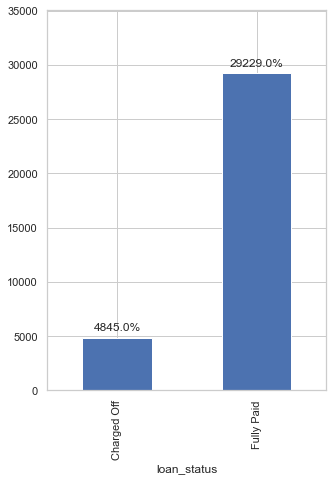

In [225]:
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [226]:
print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))

14.22


---
<mark>Approximately **14%** of loans in the dataset are **defaulted.**</mark>
<br>Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. 
(16.5 is 18% higher than 13.97 - a large enough increase) 

---

In [227]:
plt.figure(figsize=(5,7))
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

AttributeError: 'DataFrameGroupBy' object has no attribute 'total_pymnt'

<Figure size 360x504 with 0 Axes>

<mark>Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit. </mark>

### Let us see graphs of some other important variables 

#### Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


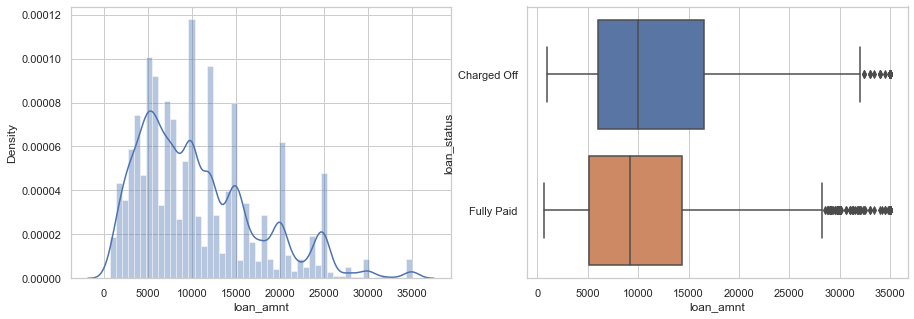

In [228]:
plot_distribution(master_loan, 'loan_amnt')

In [229]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4845.0,12136.718266,7942.948168,1000.0,6000.0,10000.0,16500.0,35000.0
Fully Paid,29229.0,10451.242773,6529.049242,725.0,5150.0,9250.0,14400.0,35000.0


**Observation:**
-  Overall, the applied loan amount distribution is slightly __right-skewed__ with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
- Funding amounts see a spike around each 5000 boundary. <mark>We will use 5000 as bucket size for later analysis.</mark>
- Charged off loans are shifted towards higher average loan amount request.

In [230]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<AxesSubplot:xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

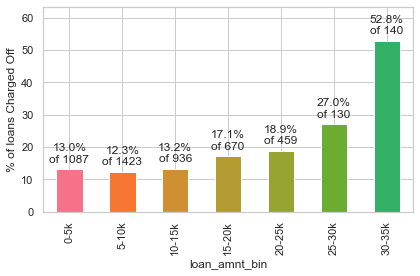

In [231]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

**Observation:**
- The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default. 

---
#### Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset 

In [232]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

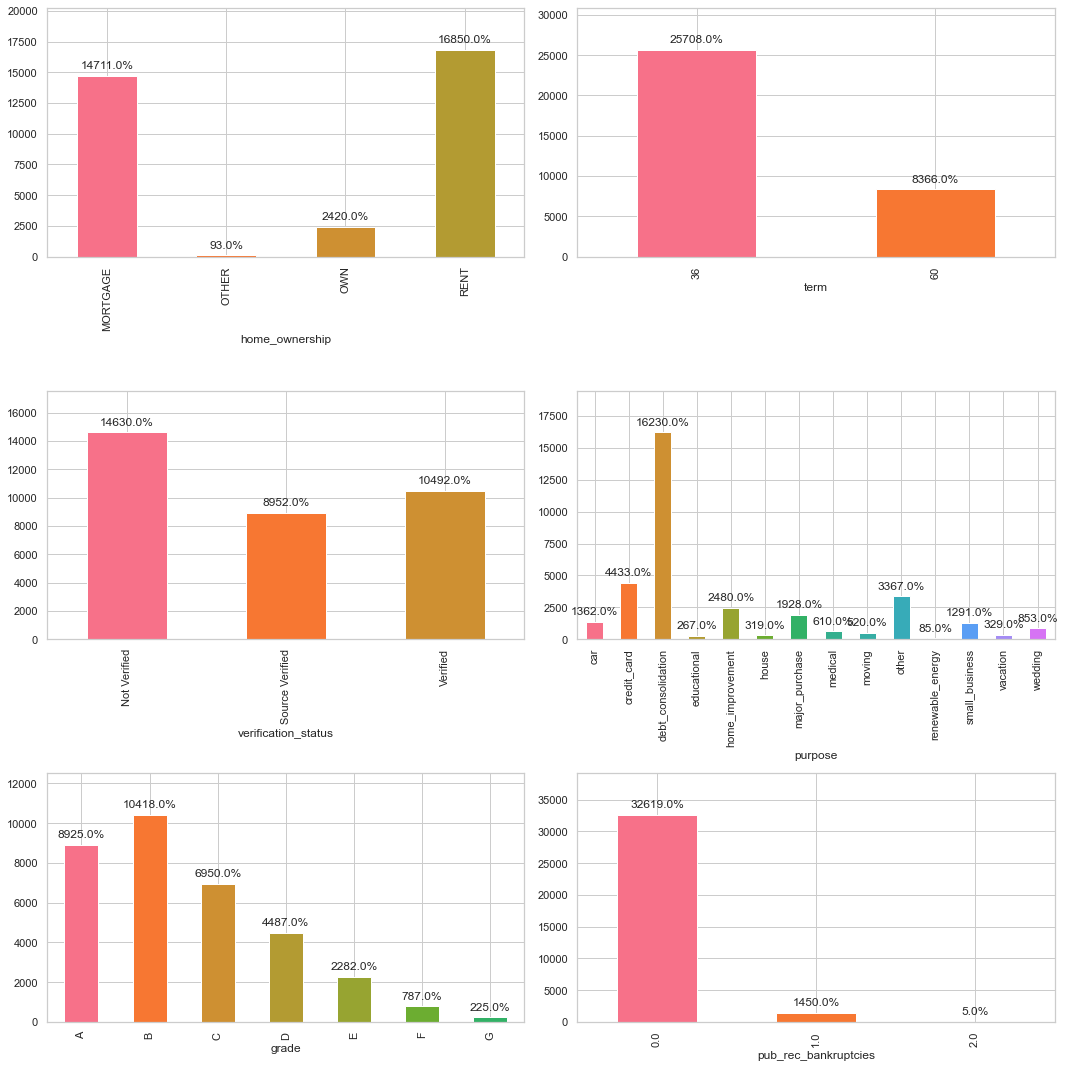

In [233]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation**
* Most loans are for 36 month term 
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan 
* Most approved loans are high grade
* <mark> We should investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy </mark>

---
#### Power Law
Do some of these variables exhibit the power law? Let's see. 

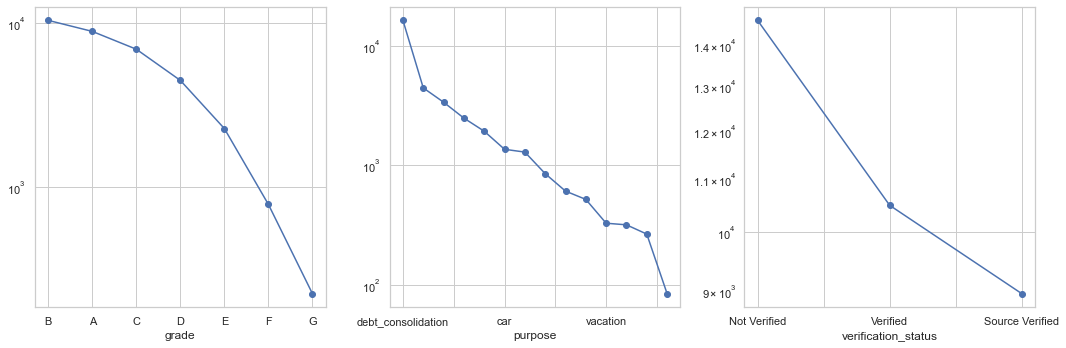

In [234]:
#Let's see if some of these variables follow the famous power law.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
master_loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
master_loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
master_loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

<mark>purpose and verification_status follow the power law</mark>

---
#### Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

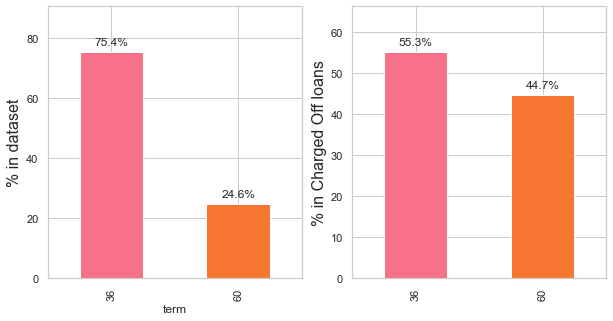

In [235]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

**Observation:**
-  Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
-  Among Charged Off loans, percentage of term 60 months rises to 45%. <mark>The higher term loans have a higher chance of default.</mark>  

---
#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

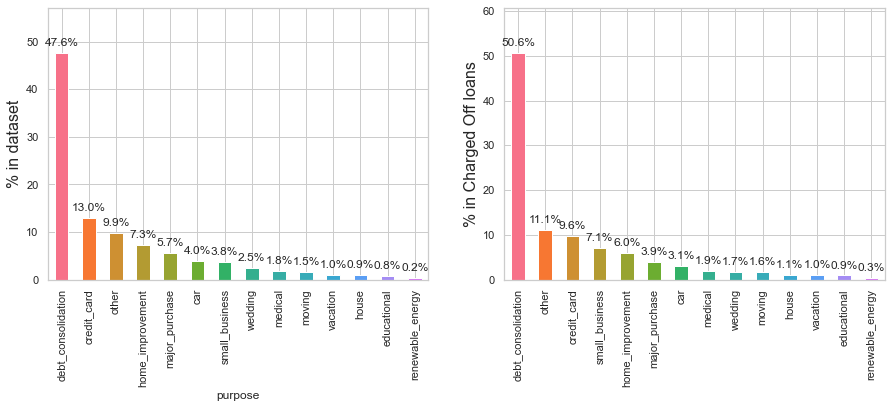

In [236]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

**Observation:**
-  <mark>The category 'small_business' percentage **doubles from 3.8 to 7.2** for Charged Off loans.</mark> Let's see how the categories of this variable behave. 

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

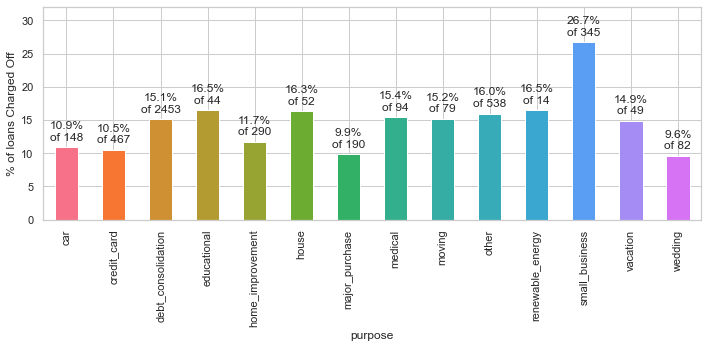

In [237]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

**Observation:**
-  <mark>26% of loans for small business are Charged Off. Making them the most risky purpose.</mark> 
- Approximately ~49% of the loans are issued for the purpose of dept consolidation.
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance. 

---
#### Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

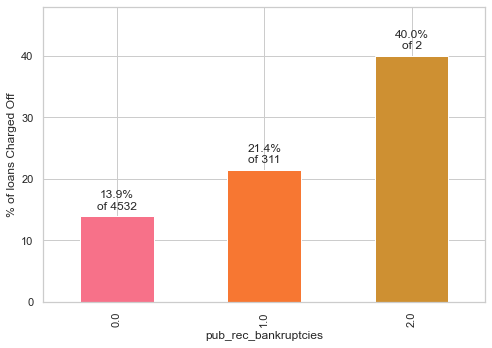

In [238]:
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

**Observation:**
-  <mark>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.</mark> 

---
#### Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [239]:
master_loan.int_rate.describe()

count    34074.000000
mean        11.905703
std          3.651201
min          5.420000
25%          8.940000
50%         11.780000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

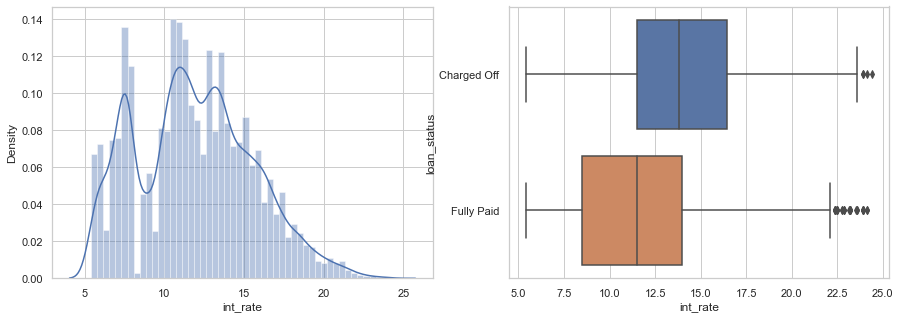

In [240]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'int_rate')

In [241]:
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4845.0,13.913108,3.636052,5.42,11.48,13.79,16.45,24.40
Fully Paid,29229.0,11.572955,3.545605,5.42,8.49,11.49,13.98,24.11


**Observation:**
-  Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
-  The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more - 

In [242]:
master_loan['interest_rate_buckets'] = round(master_loan['int_rate'])

<AxesSubplot:xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

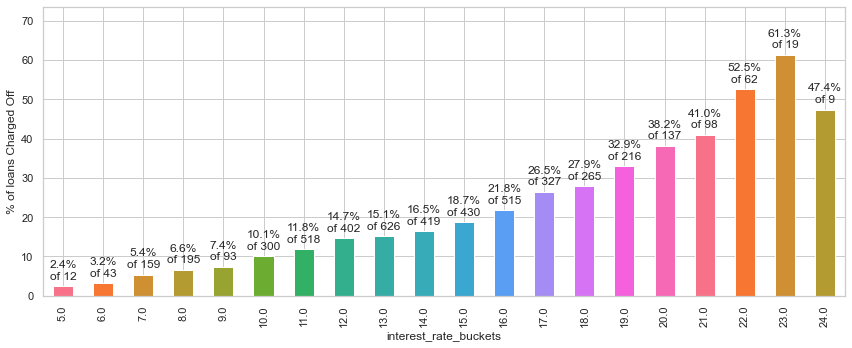

In [243]:
plt.figure(figsize=(12,5))
plotLoanStatus(master_loan, 'interest_rate_buckets')


---
#### Variable: installment
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [244]:
master_loan.installment.describe()

count    34074.000000
mean       312.325796
std        192.733159
min         19.870000
25%        165.740000
50%        275.070000
75%        410.885000
max       1305.190000
Name: installment, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

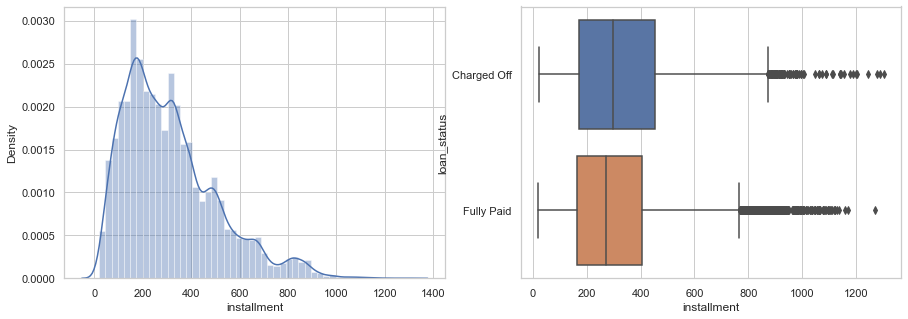

In [245]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

In [246]:
master_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4845.0,334.953441,211.125181,22.79,171.55,296.75,452.77,1305.19
Fully Paid,29229.0,308.575036,189.254811,19.87,164.86,271.91,405.66,1269.73


**Observation:**
-  installment amount varies largely between 170.08 to 420 with median of 280
-  loans Charged Off have high installment on average 

---
#### Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

In [247]:
master_loan.grade.value_counts()

B    10418
A     8925
C     6950
D     4487
E     2282
F      787
G      225
Name: grade, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [248]:
master_loan.sub_grade.value_counts(normalize=True).head()

A4    0.076187
B3    0.073458
A5    0.070934
B5    0.069437
B4    0.064125
Name: sub_grade, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


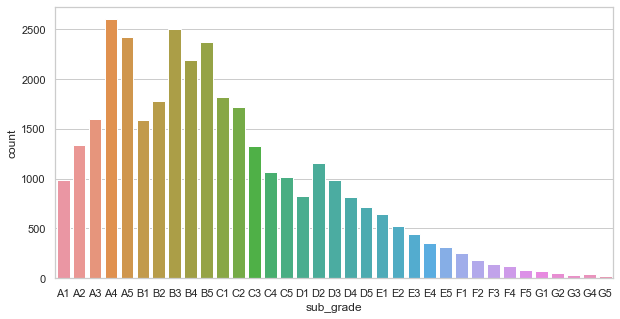

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(master_loan['sub_grade'], order=sorted(master_loan.sub_grade.unique()))
plt.show()

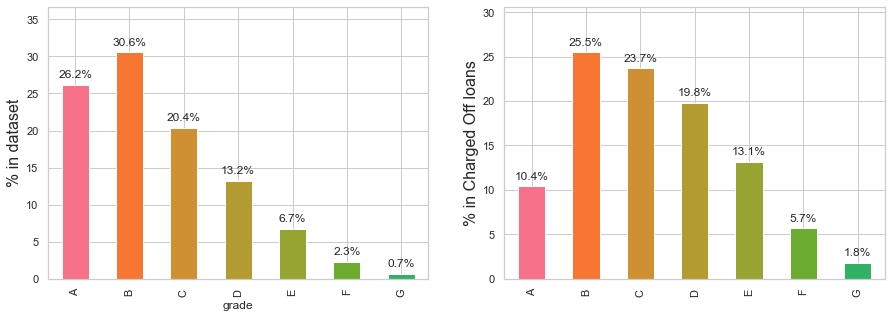

In [250]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)

**Observation:**
-  Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans. 
- Grade D, E, F, G loans are less safe. <mark>We should plot grade by percentage Charged Off by category</mark>
- Lending Clubs grading system is working well. 

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

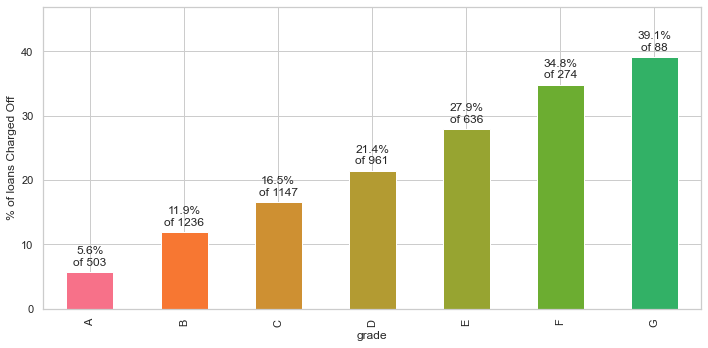

In [251]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'grade')

**Observation:**
- Nearly 30% of all loans in Grades F and G see a default. 
- Grade E onwards are risky, and less numerous. <mark>Lending Club should either refuse loans or charge high interest rates.</mark>

<AxesSubplot:title={'center':'int_rate'}, xlabel='grade'>

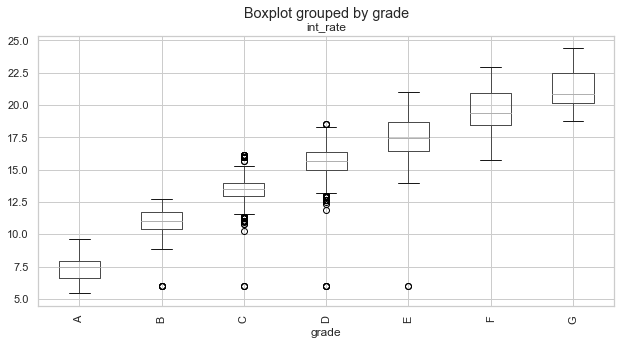

In [252]:
fig, ax = plt.subplots(figsize=(10,5))
master_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

**Observation:**
- Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans. 

---
#### Variable - emp_title
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [253]:
top10_emp_title = master_loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

US Army              122
Bank of America      104
IBM                   56
AT&T                  55
Kaiser Permanente     52
Wells Fargo           49
US Air Force          49
UPS                   49
USAF                  49
Walmart               43
Name: emp_title, dtype: int64

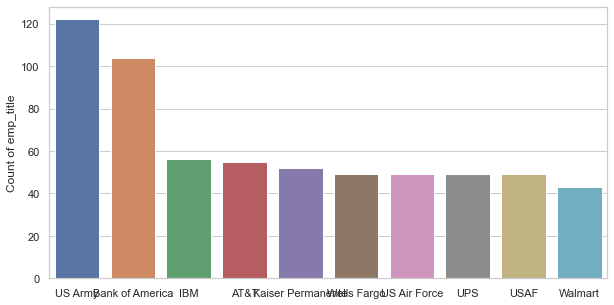

In [254]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation:**
-  Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
- Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
- <mark>The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

<AxesSubplot:xlabel='emp_title', ylabel='% of loans Charged Off'>

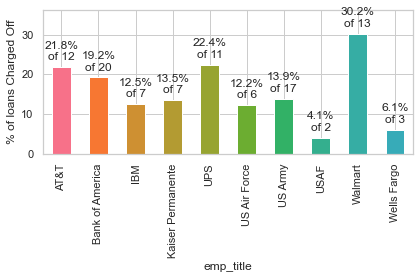

In [255]:
plotLoanStatus(master_loan[master_loan['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

---
#### Variable - emp_length
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [256]:
master_loan.emp_length.value_counts(normalize=True)

10    0.220080
2     0.116599
0     0.113811
3     0.109761
4     0.091653
5     0.086635
1     0.084845
6     0.058608
7     0.046516
8     0.038182
9     0.033310
Name: emp_length, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


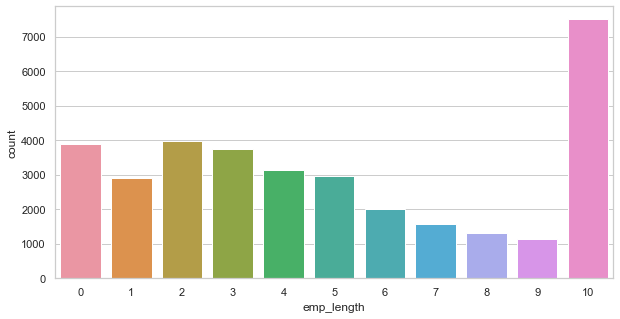

In [257]:
plt.figure(figsize=(10,5))
sns.countplot(master_loan['emp_length'], order=sorted(master_loan.emp_length.unique()))
plt.show()

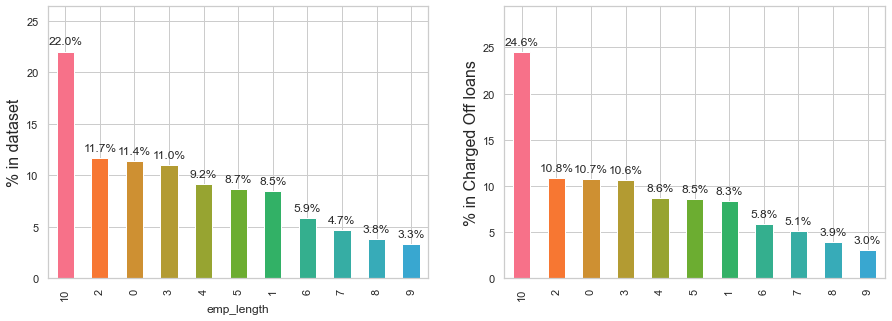

In [258]:
plt.figure(figsize=(15, 5))
plot_percentages(master_loan, 'emp_length')

**Observation:**
- 22.7% of the of loan taker have an employment length of more than 10 years.
- <mark>There is no impact of employment length to chance of loan default.</mark>

---
#### Variable - home_ownership
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

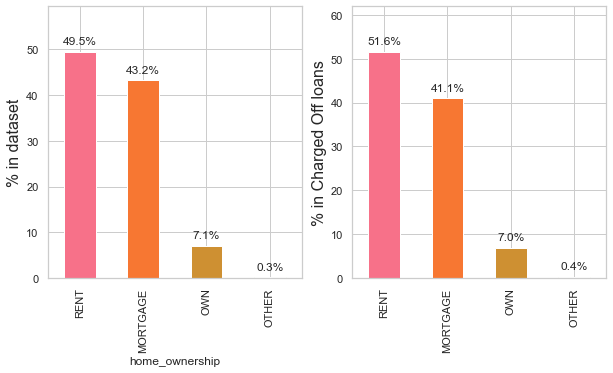

In [259]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'home_ownership')

**Observation:**
- <mark>There is no impact of home_ownership to propensity to default on loan.</mark>


#### Variable - annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [260]:
master_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.407400e+04
mean     6.669938e+04
std      6.225198e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.030000e+04
50%      5.769608e+04
75%      8.000000e+04
90%      1.100000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

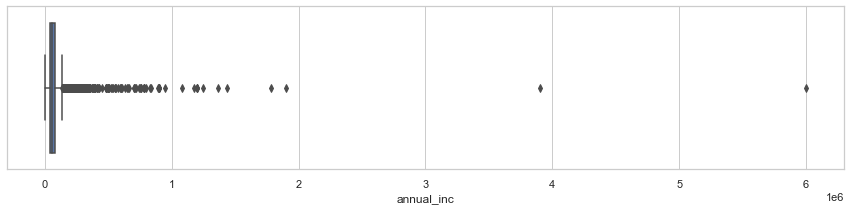

In [261]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master_loan['annual_inc'], data=master_loan)

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. <mark>There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000).</mark>
<br> Median annual income is around 60,000
<br> Most people have an annual income less than 115000

In [262]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = master_loan[np.abs(master_loan.annual_inc-master_loan.annual_inc.mean()) <= (3*master_loan.annual_inc.std())]

In [263]:
df.annual_inc.describe()

count     33885.000000
mean      64251.895025
std       33705.899038
min        4000.000000
25%       40000.000000
50%       57500.000000
75%       80000.000000
max      250000.000000
Name: annual_inc, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


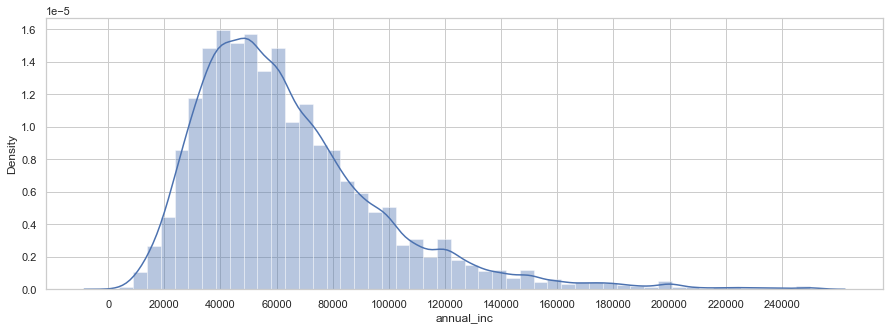

In [264]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation:**
-  10000 seems to be a good bin size to further analyze income as categories 

In [265]:
#Create Derived categorical variable
master_loan['income_bin'] = master_loan['annual_inc']/20000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
master_loan['income_bin'] = master_loan['income_bin'].astype(int)


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

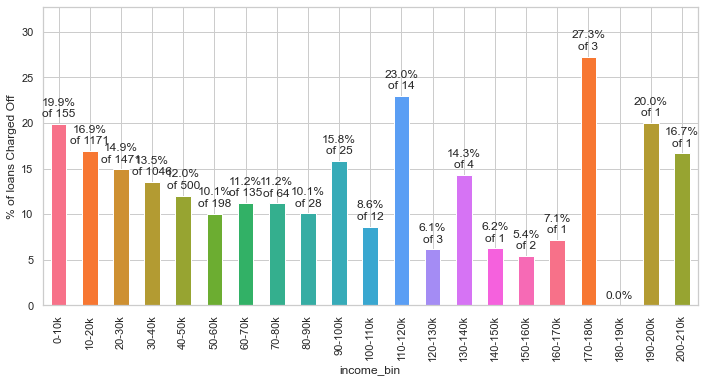

In [266]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(master_loan.loc[master_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation:**
- <mark>Loan defaults are higher for lower income, and progressively reduce as incomes go up.</mark>
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later. 

---
#### Variable - verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [267]:
master_loan.verification_status.value_counts()

Not Verified       14630
Verified           10492
Source Verified     8952
Name: verification_status, dtype: int64

Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

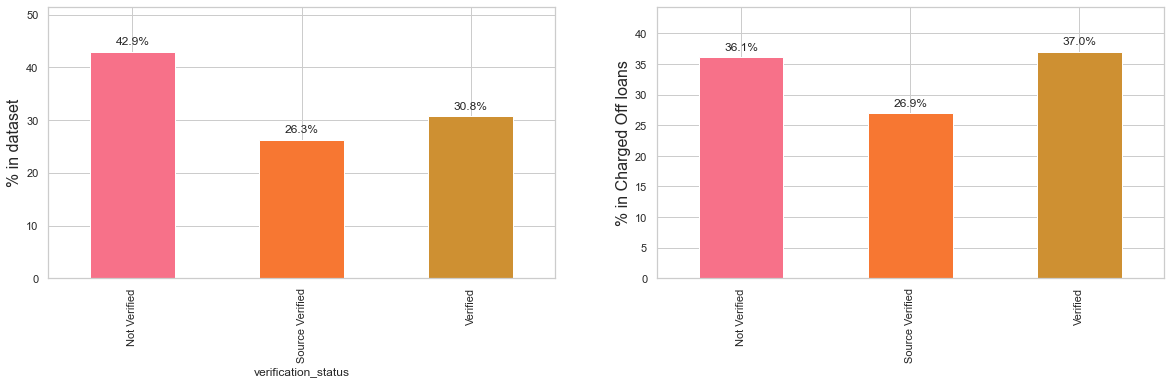

In [268]:
plt.figure(figsize=(20,5))
plot_percentages(master_loan, 'verification_status', True)

**Observation:**
-  Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
-  <mark>Verified loans show more charged Off percentage as compared to Not verified loans.</mark> This is unexpected and will be investigated later in bivariate analysis 

#### Variable: issue_d
Data_Dictionary: The month which the loan was funded

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


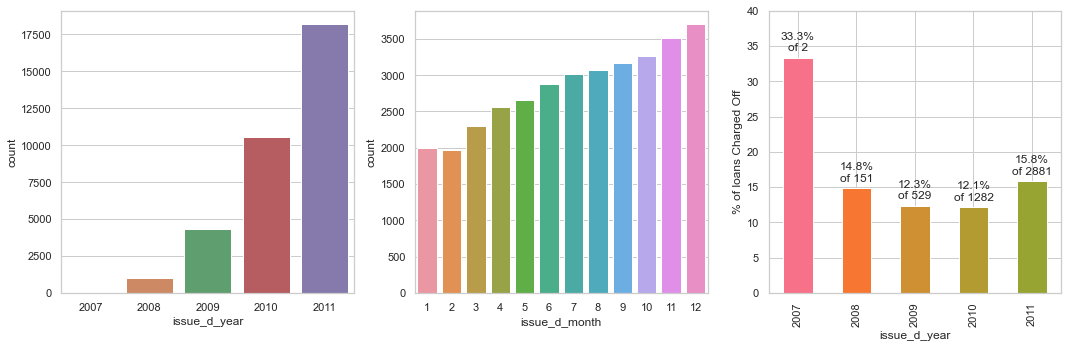

In [269]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(master_loan['issue_d_year'], order=sorted(master_loan.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(master_loan['issue_d_month'], order=sorted(master_loan.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(master_loan, 'issue_d_year')

plt.show()


**Observation:**
-  Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year? 
-  Year of loan has no significant effect on likelihood of default. 

<AxesSubplot:xlabel='issue_d_month', ylabel='% of loans Charged Off'>

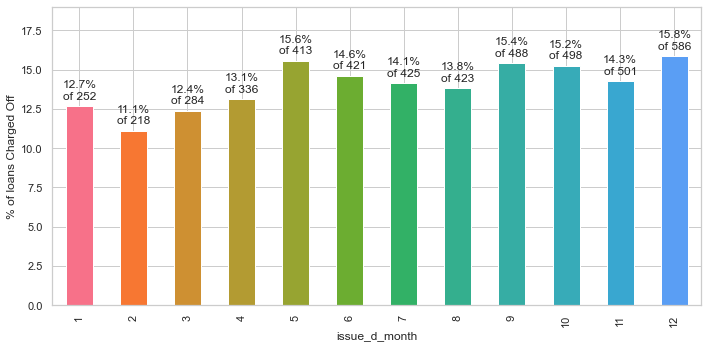

In [270]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'issue_d_month')

**Observation:**
-  Month of loan is spread out and has no significant effect on likelihood of default. 

---
#### Variable - title
Data_Dictionary: The loan title provided by the borrower

In [271]:
master_loan.title.describe()

AttributeError: 'DataFrame' object has no attribute 'title'

In [ ]:
master_loan.title.value_counts().head(10)

**Observation:**
- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [ ]:
master_loan = master_loan.drop('title',axis =1 )

---
#### Variable - addr_state
Data_Dictionary: The state provided by the borrower in the loan application

In [272]:
master_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.180754
NY    0.096144
FL    0.071902
TX    0.069466
NJ    0.046663
PA    0.039356
IL    0.038827
VA    0.035364
GA    0.034983
MA    0.033398
Name: addr_state, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


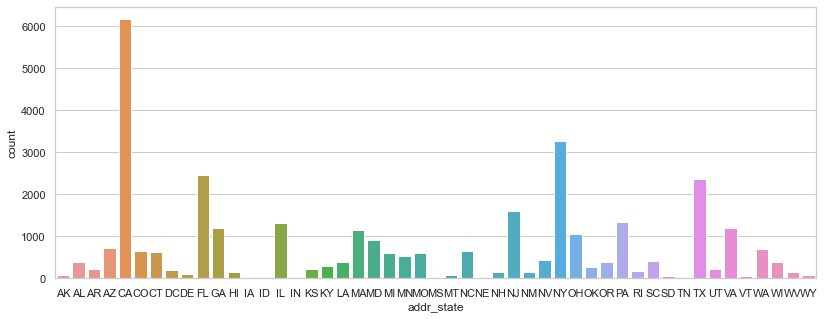

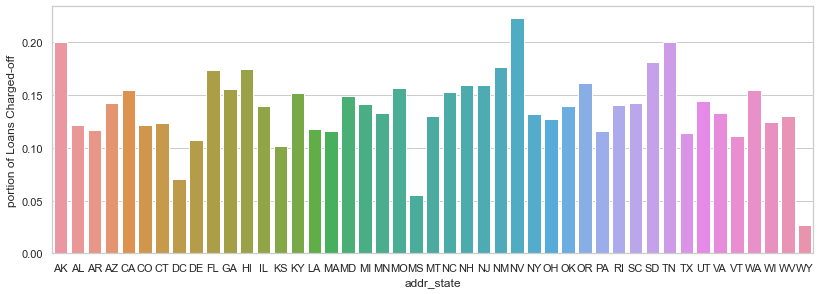

In [273]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(master_loan['addr_state'], order=sorted(master_loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()


**Observation:**
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default. 


---
#### Variable - dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [274]:
master_loan.dti.describe()

count    34074.000000
mean        13.347577
std          6.648145
min          0.000000
25%          8.240000
50%         13.440000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

The dti index varies from min 0 to max of 30. The median dti is of 13.5

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

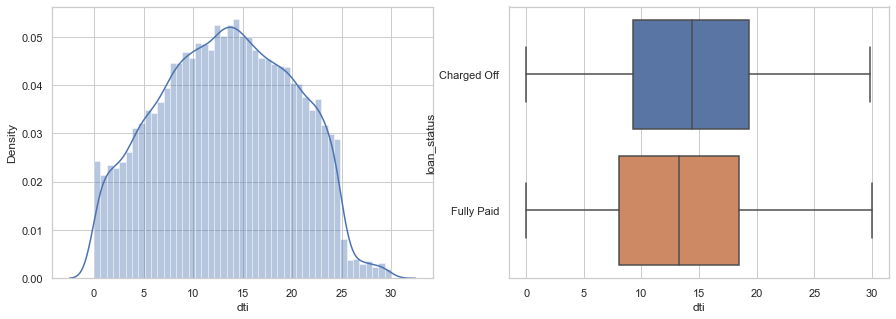

In [275]:
plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'dti')

In [276]:
# Create derived variable 
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

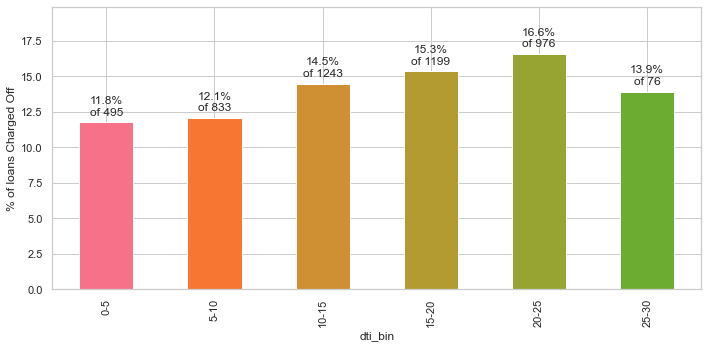

In [277]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'dti_bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

---
#### Variable - delinq_2yrs
Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [278]:
master_loan.delinq_2yrs.value_counts(normalize=True)

0     0.891794
1     0.082908
2     0.017257
3     0.005400
4     0.001497
5     0.000616
6     0.000293
7     0.000117
8     0.000059
9     0.000029
11    0.000029
Name: delinq_2yrs, dtype: float64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

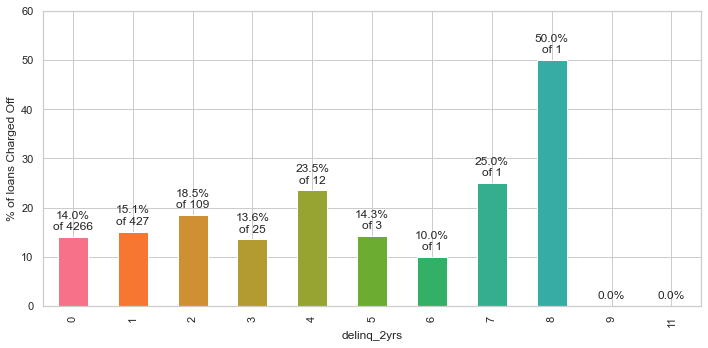

In [279]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1. 


---
#### Variable - earliest_cr_line
Data_Dictionary: The month the borrower's earliest reported credit line was opened.

In [280]:
master_loan.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.084815
1999    0.077214
1998    0.072930
2001    0.066884
1997    0.062159
Name: earliest_cr_line_year, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


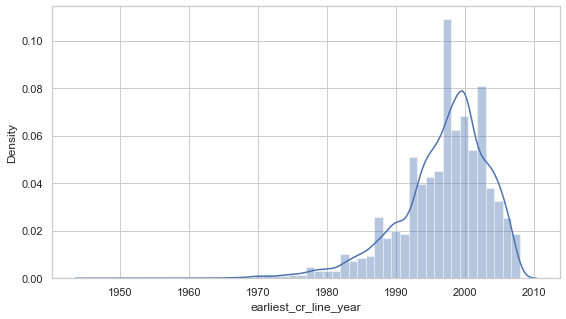

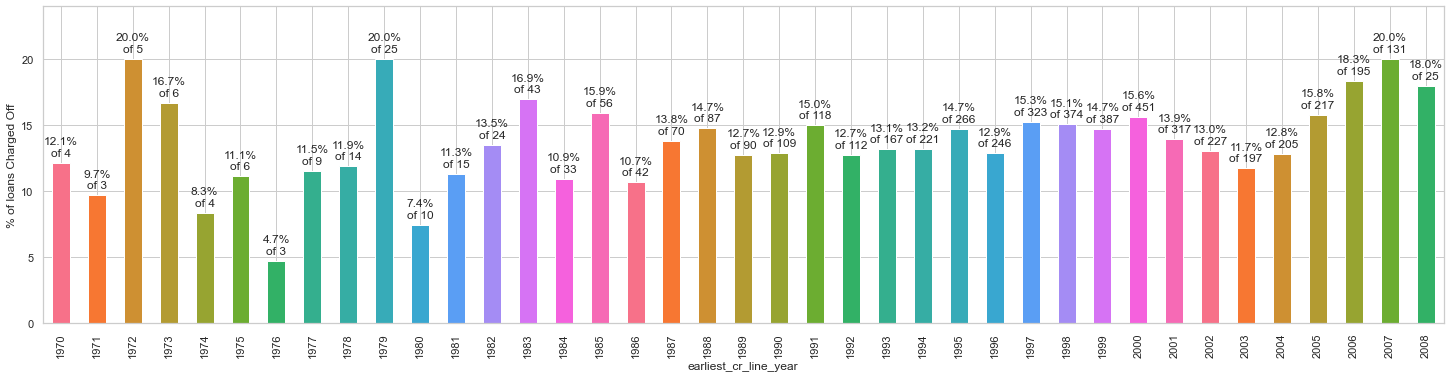

In [281]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master_loan['earliest_cr_line_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(master_loan.loc[master_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()


**Observation:**
-  8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis. 
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis. 

---
#### Variable - inq_last_6mths
Data_Dictionary: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [282]:
master_loan.inq_last_6mths.value_counts(normalize=True)

0    0.484768
1    0.277367
2    0.147033
3    0.076980
4    0.007836
5    0.003522
6    0.001379
7    0.000792
8    0.000323
Name: inq_last_6mths, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


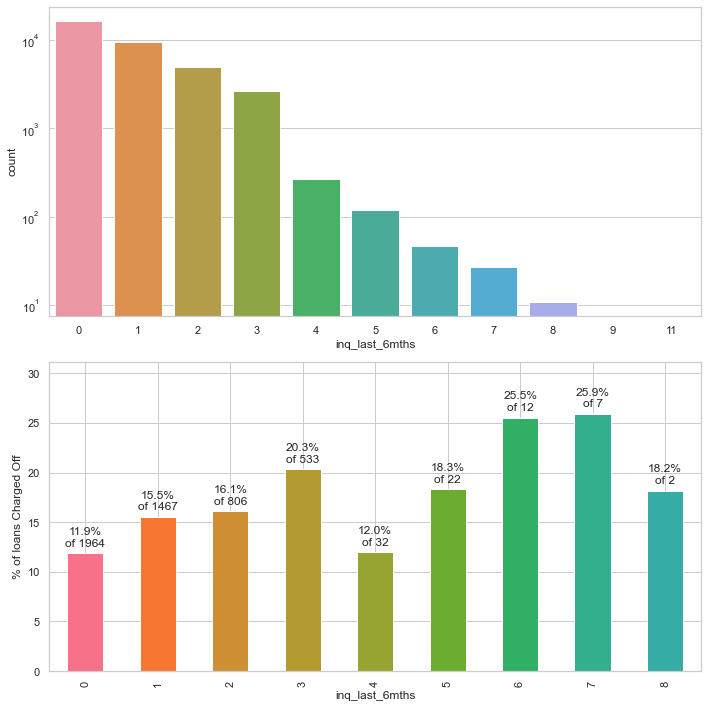

In [283]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(master_loan['inq_last_6mths'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(master_loan, 'inq_last_6mths')
plt.show()

**Observation:**
-  48.5% of the borrowers do not make any inquiry
-  Those with more than 2 inquiries default at higher rates. 
- This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.

---
#### Variable - open_acc
Data_Dictionary: The number of open credit lines in the borrower's credit file.

In [284]:
master_loan.open_acc.describe()

count    34074.000000
mean         9.238862
std          4.339505
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         39.000000
Name: open_acc, dtype: float64

The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

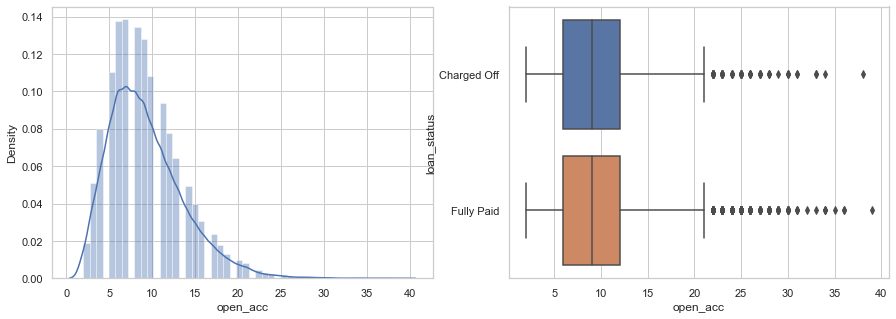

In [285]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'open_acc')
plt.show()

In [286]:
master_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4845.0,9.232817,4.460705,2.0,6.0,9.0,12.0,38.0
Fully Paid,29229.0,9.239865,4.319163,2.0,6.0,9.0,12.0,39.0


**Observation:**
-  The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

---
#### Variable - pub_rec
Data_Dictionary: Number of derogatory public records.

In [287]:
master_loan.pub_rec.value_counts(normalize=True)

0    0.946205
1    0.052239
2    0.001291
3    0.000205
4    0.000059
Name: pub_rec, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


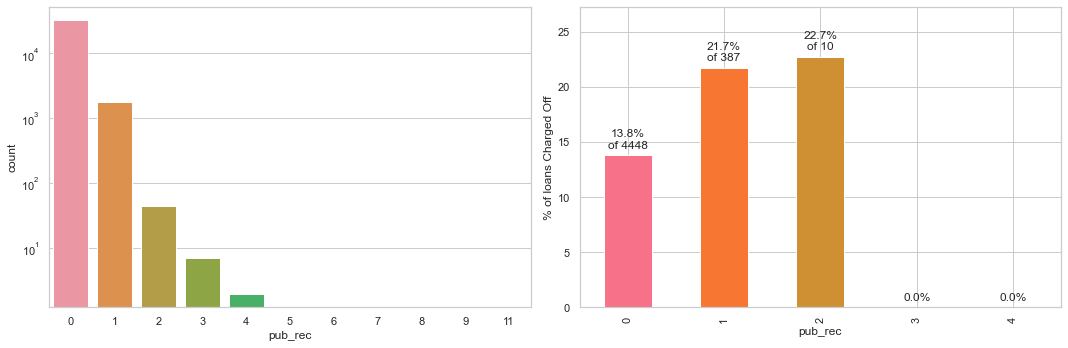

In [288]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(master_loan['pub_rec'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(master_loan, 'pub_rec')
plt.show()



**Observation:**
- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

---
#### Variable - revol_bal
Data_Dictionary: Total credit revolving balance

In [289]:
master_loan.revol_bal.describe()

count    34074.000000
mean     11577.322592
std      10857.883409
min          0.000000
25%       3639.000000
50%       8579.000000
75%      16044.000000
max      60376.000000
Name: revol_bal, dtype: float64

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of ~9000.

In [290]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
master_loan = master_loan[np.abs(master_loan.revol_bal-master_loan.revol_bal.mean()) <= (3*master_loan.revol_bal.std())]

The values vary a lot. Transforming to a log scale will help analyse better.

In [291]:
master_loan['revol_bal_log'] = master_loan['revol_bal'].apply(lambda x : np.log(x+1))

C:\Users\anjal\AppData\Local\Temp/ipykernel_26896/3475684446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loan['revol_bal_log'] = master_loan['revol_bal'].apply(lambda x : np.log(x+1))


C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


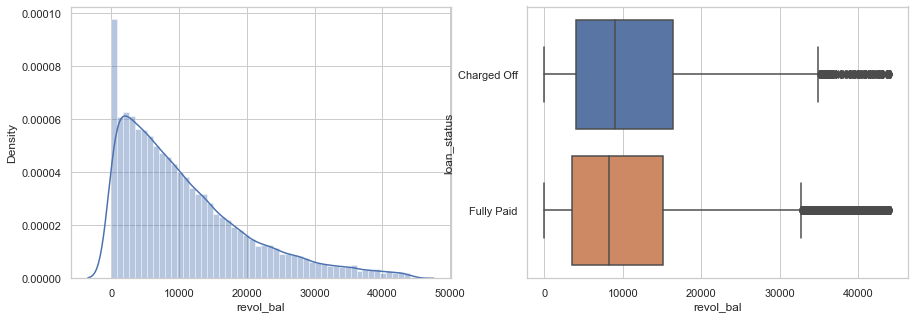

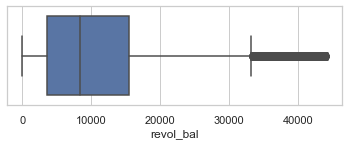

In [292]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(master_loan['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master_loan['revol_bal'], y=master_loan['loan_status'], data=master_loan)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=master_loan['revol_bal'], data=master_loan)
plt.show()

In [293]:
master_loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4727.0,11473.646499,9687.429573,0.0,3990.0,9039.0,16385.50,44128.0
Fully Paid,28634.0,10613.653419,9202.082181,0.0,3471.0,8200.5,15177.75,44140.0


**Observation:**
-  There is no large difference in revolving balance mean for charged off an fully Paid loans

---
#### Variable - revol_util
Data_Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [294]:
master_loan.revol_util.describe()

count    33361.000000
mean        48.532603
std         28.170913
min          0.000000
25%         25.200000
50%         48.900000
75%         71.800000
max         99.900000
Name: revol_util, dtype: float64

<AxesSubplot:title={'center':'revol_util'}, xlabel='loan_status'>

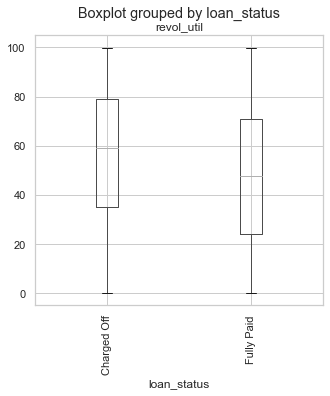

In [295]:
fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation:**
-  The average utilization rate is around 49%
-  <mark>Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans</mark>. This requires more analysis. 

In [296]:
master_loan['revol_util_bin'] = round(master_loan['revol_util']/5)

C:\Users\anjal\AppData\Local\Temp/ipykernel_26896/1228660603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loan['revol_util_bin'] = round(master_loan['revol_util']/5)


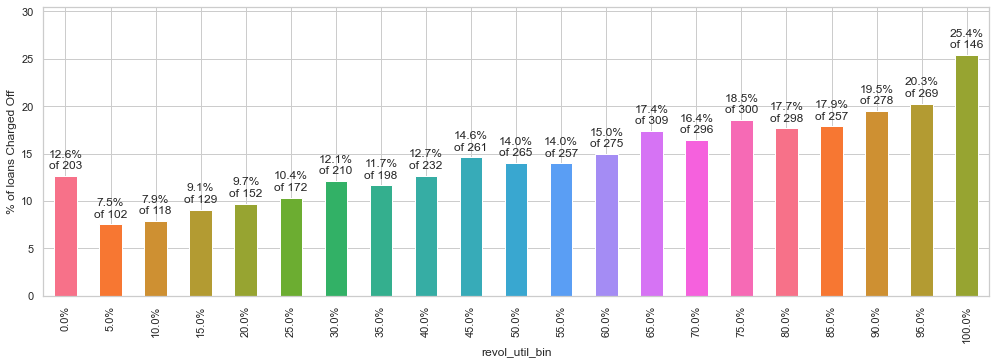

In [297]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(master_loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

---
#### Variable - total_acc
Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

In [298]:
master_loan.total_acc.describe()

count    33361.000000
mean        21.715536
std         11.228265
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

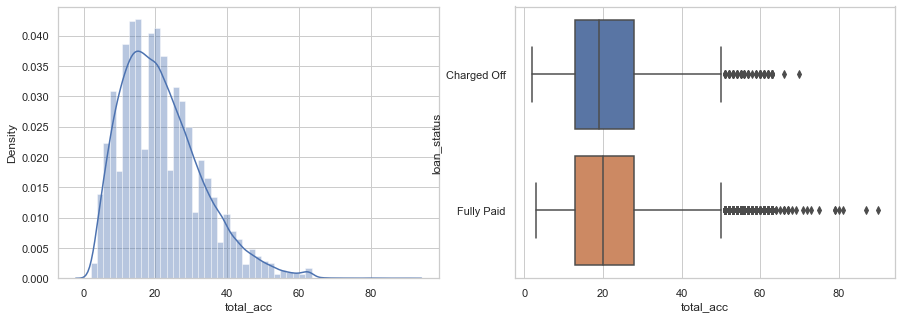

In [299]:
plt.figure(figsize=(15,5))

plot_distribution(master_loan, 'total_acc')

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines

In [317]:
master_loan['last_pymnt_d_month']= master_loan['last_pymnt_d'].dt.month
master_loan['last_pymnt_d_year']= master_loan['last_pymnt_d'].dt.year

C:\Users\anjal\AppData\Local\Temp/ipykernel_26896/1379945159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loan['last_pymnt_d_month']= master_loan['last_pymnt_d'].dt.month
C:\Users\anjal\AppData\Local\Temp/ipykernel_26896/1379945159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loan['last_pymnt_d_year']= master_loan['last_pymnt_d'].dt.year


C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


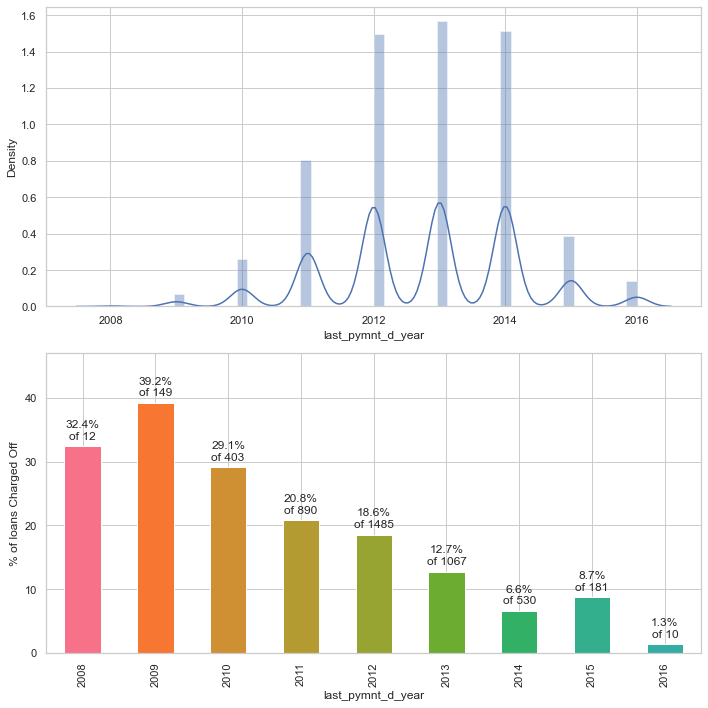

In [318]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master_loan['last_pymnt_d_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.subplot(2, 1, 2)
plotLoanStatus(master_loan, 'last_pymnt_d_year')
plt.show()


**Observation:**
-  Overall, around 75% of the last payment dates are during 2012-2014 period.
-  40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis. 
- This variable does not affect analysis and will be ignored. 

---
#### Variable - last_pymnt_amnt
Data_Dictionary: Last total payment amount received.

In [319]:
master_loan.last_pymnt_amnt.describe()

count    33361.000000
mean      2628.167803
std       4194.559551
min          0.010000
25%        219.040000
50%        564.780000
75%       3404.070000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [320]:
master_loan['last_pymnt_amnt_log'] = master_loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

C:\Users\anjal\AppData\Local\Temp/ipykernel_26896/2276939924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loan['last_pymnt_amnt_log'] = master_loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))


C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

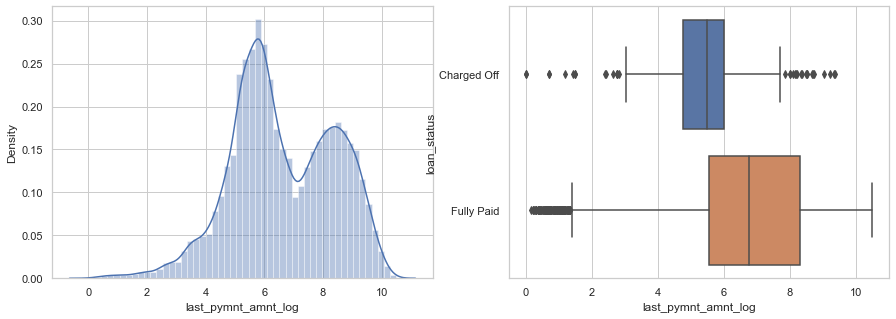

In [321]:
plt.figure(figsize=(15,5))

plot_distribution(master_loan, 'last_pymnt_amnt_log')
plt.show()

**Observation:**
-  The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans 

---
#### Variable - last_credit_pull_d
Data_Dictionary: The most recent month LC pulled credit for this loan.

In [322]:
master_loan.last_credit_pull_d.value_counts().head()

2016-05-01    8138
2016-04-01    2060
2016-03-01     990
2013-02-01     737
2016-02-01     647
Name: last_credit_pull_d, dtype: int64

In [323]:
master_loan['last_credit_pull_d_month']= master_loan['last_credit_pull_d'].dt.month
master_loan['last_credit_pull_d_year']= master_loan['last_credit_pull_d'].dt.year

In [324]:
master_loan.last_credit_pull_d_year.value_counts(normalize=True)

2016    0.371961
2014    0.162525
2015    0.145559
2013    0.136177
2012    0.106861
2011    0.054315
2010    0.017925
2009    0.004197
2008    0.000480
Name: last_credit_pull_d_year, dtype: float64

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


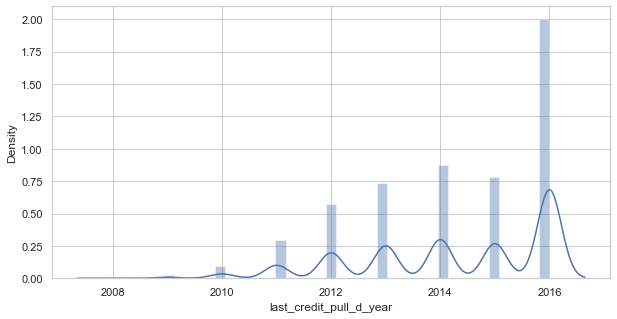

In [325]:
plt.figure(figsize=(10,5))
sns.distplot(master_loan['last_credit_pull_d_year'])
plt.show()


**Observation:**
-  Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously 
- This variable can be ignored in our analysis. 

--- 
#### Derived variable - ratio of loan amount to annual income 

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio', ylabel='Density'>

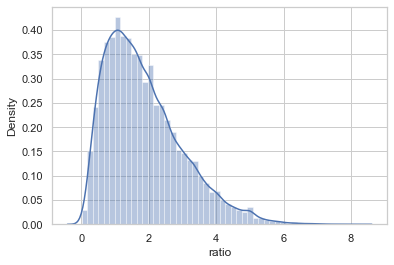

In [326]:
master_loan['ratio'] = master_loan['loan_amnt'] * 10 / master_loan['annual_inc']
sns.distplot(master_loan['ratio'])

<AxesSubplot:xlabel='ratio_bin', ylabel='% of loans Charged Off'>

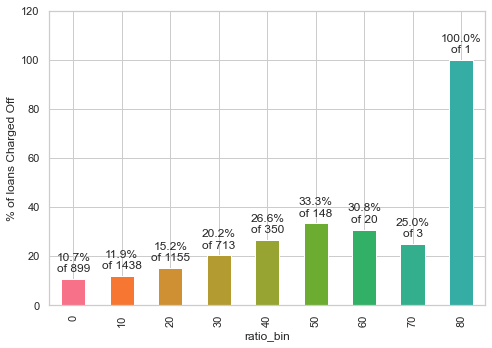

In [327]:
master_loan['ratio_bin'] = (master_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'ratio_bin')

**Observation:**
-  As long as loan amount is less than 20% of annual income, defaults are low. 
- <mark>Loan amounts of 30% of annual income or higher see a high rate of default.</mark>

### Bivariate Analysis

---
#### loan_amnt over time

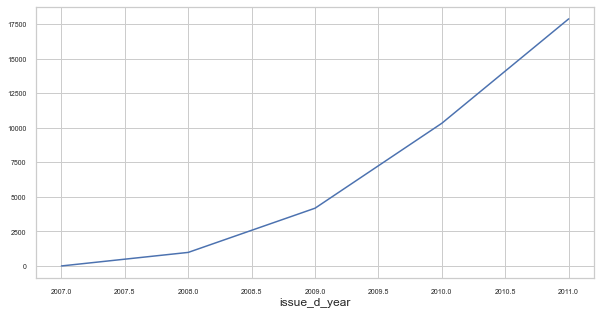

In [328]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

---
#### Avg. loan_amnt over time

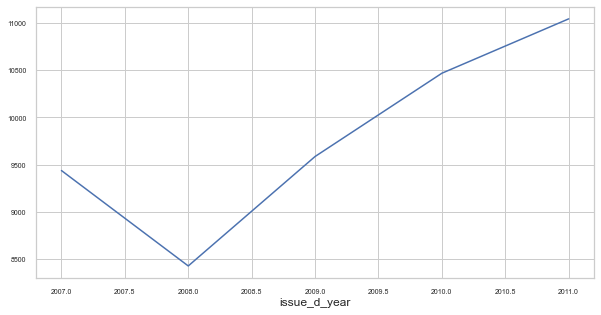

In [329]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Observation:**
-  Average loan amount dropped sharply when subprime mortgage crisis hit

---
####  loan_amnt and annual_inc

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


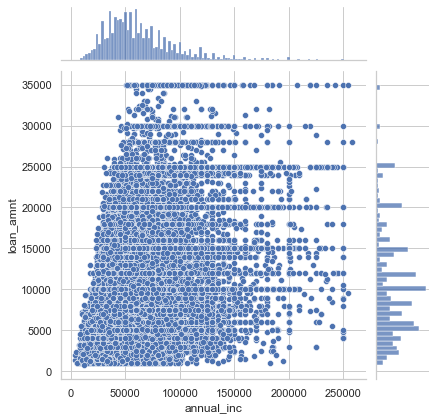

In [330]:
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

---
#### loan_amnt vs grade

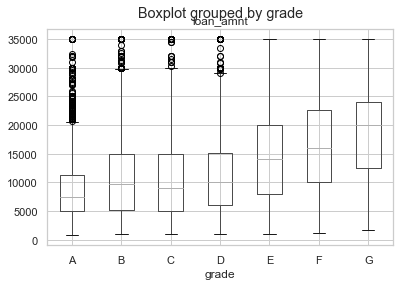

In [331]:
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

---
##### annual income with grade

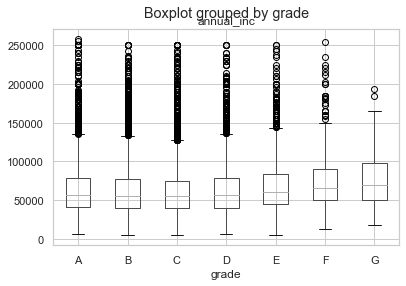

In [332]:
master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

---
#### loan_amnt vs verification_status vs loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

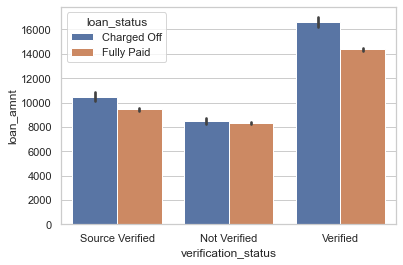

In [333]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)

**Observation:**
- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- <mark>This, combined with previous observation, explains why verfied loans see a higher rate of default.</mark> It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

---
#### Interest Rate and Term

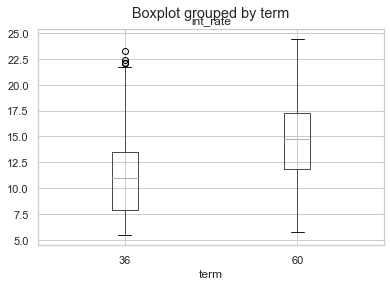

In [334]:
#master_loan.groupby('term').int_rate.mean().plot(kind='bar')
master_loan.boxplot(column='int_rate', by='term')
plt.show()

**Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

---
#### Interest Rate and Sub Grade

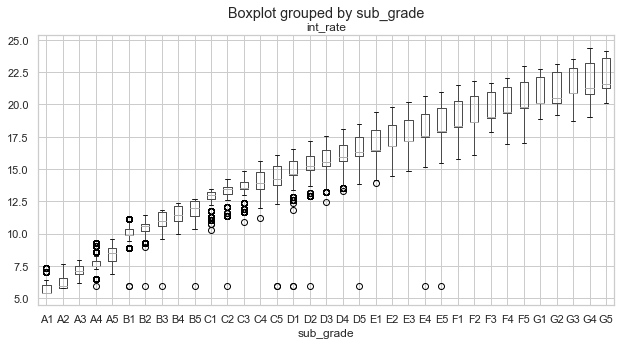

In [335]:
master_loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation:**
-  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

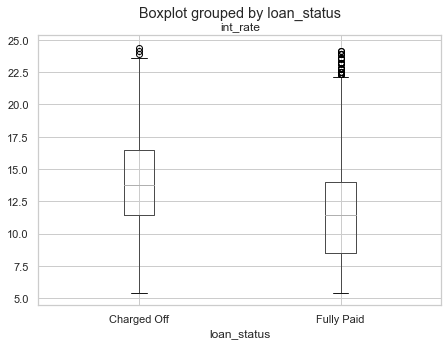

In [336]:
master_loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

**Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

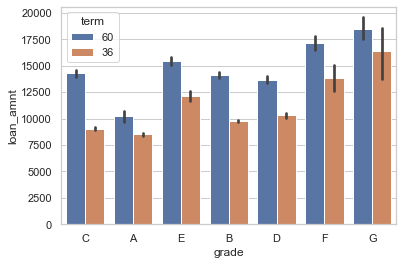

In [337]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


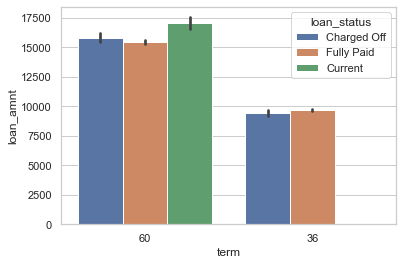

In [338]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=clean_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


#### revol_util Vs grade Vs Loan Status


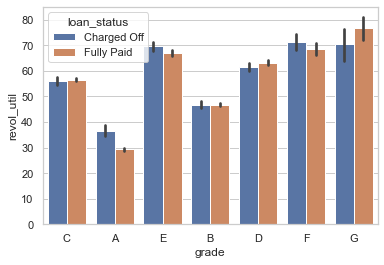

In [339]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

#### Loan amount Vs addr_state vs loan Status


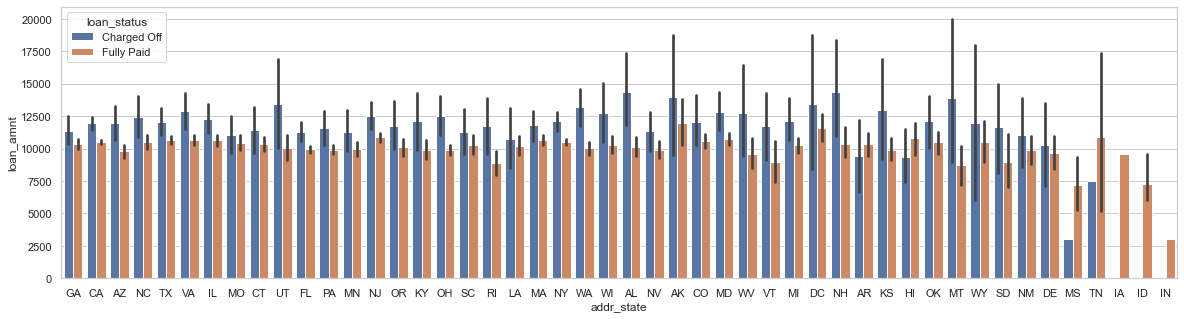

In [340]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

#### revol_rate Vs int_rate

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


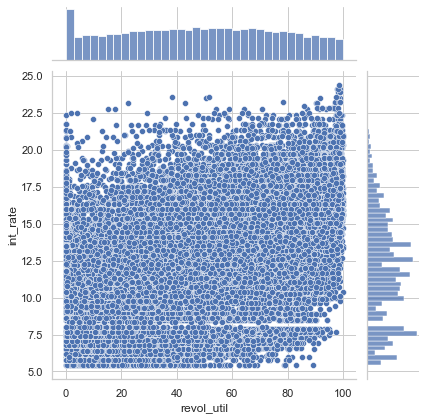

In [341]:
sns.jointplot('revol_util', 'int_rate', master_loan)

#### revol_util vs Grade

<Figure size 1440x360 with 0 Axes>

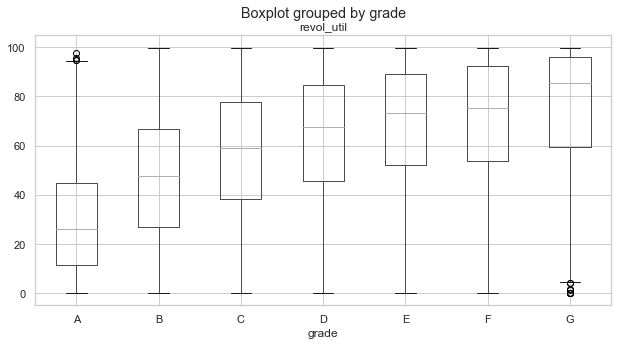

In [342]:
plt.figure(figsize=(20,5))
master_loan.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [343]:
corr=master_loan.corr()
corr['loan_amnt']

loan_amnt                   1.000000
int_rate                    0.263361
installment                 0.925557
emp_length                  0.138923
annual_inc                  0.225719
dti                         0.058255
delinq_2yrs                -0.040153
inq_last_6mths              0.010036
open_acc                    0.161266
pub_rec                    -0.038776
revol_bal                   0.365434
revol_util                  0.057114
total_acc                   0.239842
last_pymnt_amnt             0.443741
pub_rec_bankruptcies       -0.021586
earliest_cr_line_month     -0.013155
earliest_cr_line_year      -0.174171
issue_d_month               0.052602
issue_d_year                0.090159
income_bin                  0.226562
revol_bal_log               0.235983
revol_util_bin              0.056846
last_pymnt_d_month          0.000773
last_pymnt_d_year           0.065554
last_pymnt_amnt_log         0.377576
last_credit_pull_d_month   -0.011938
last_credit_pull_d_year     0.041737
r

<AxesSubplot:>

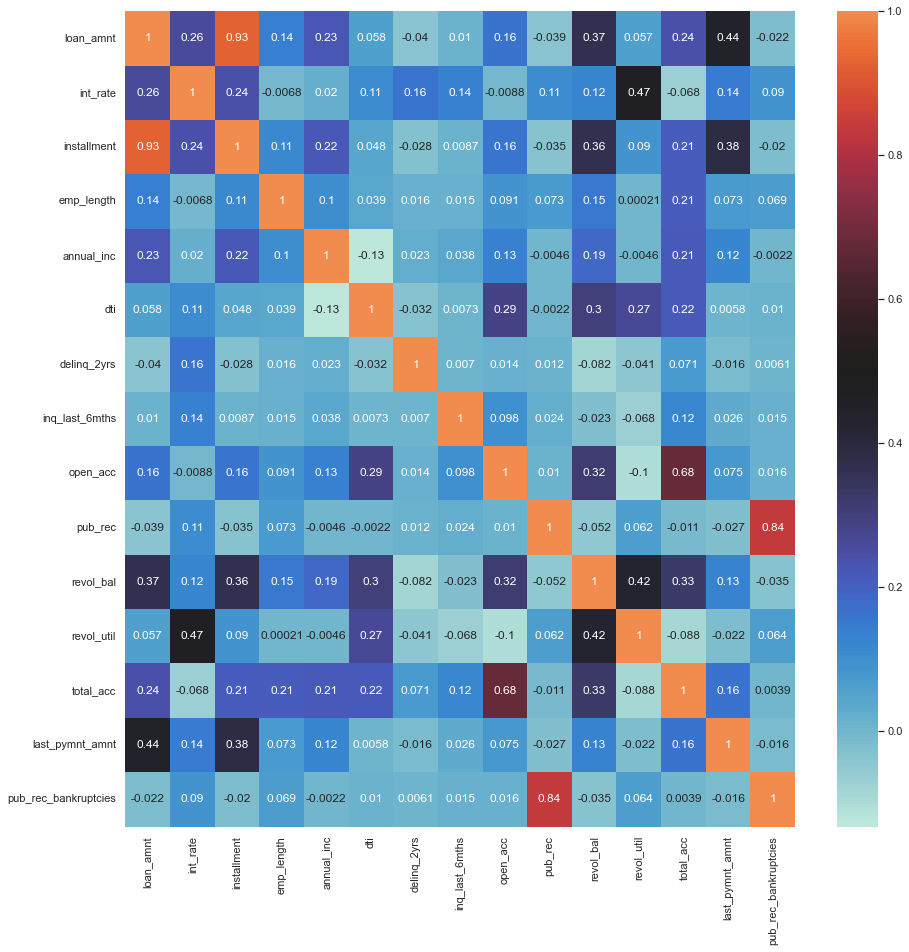

In [344]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation:**
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- <mark>loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.</mark>
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


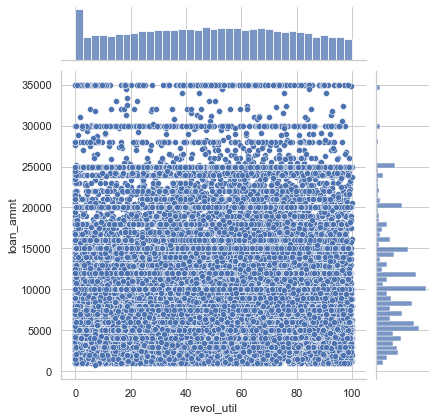

In [345]:
sns.jointplot('revol_util', 'loan_amnt', master_loan)

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


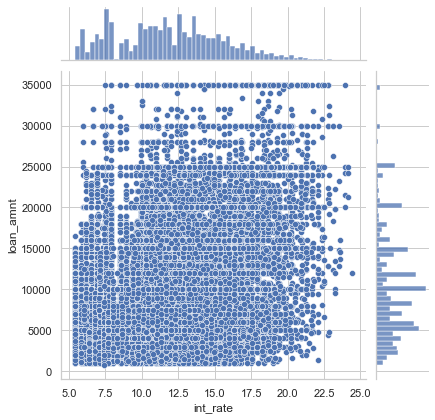

In [346]:
sns.jointplot('int_rate', 'loan_amnt', master_loan)

####  dti vs open_acc

In [347]:
master_loan['dti_bin']
master_loan.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.056623
5-10     11.532037
10-15    11.975062
15-20    12.307408
20-25    12.543240
25-30     9.466167
Name: int_rate, dtype: float64

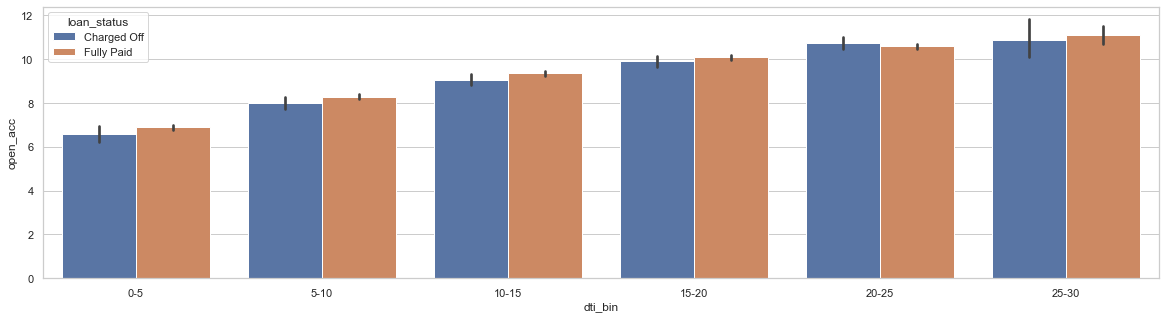

In [348]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  The dti increses with the number of open credit line in borrowers credit file.

####  delinq_2yr VS loan amount VS grade

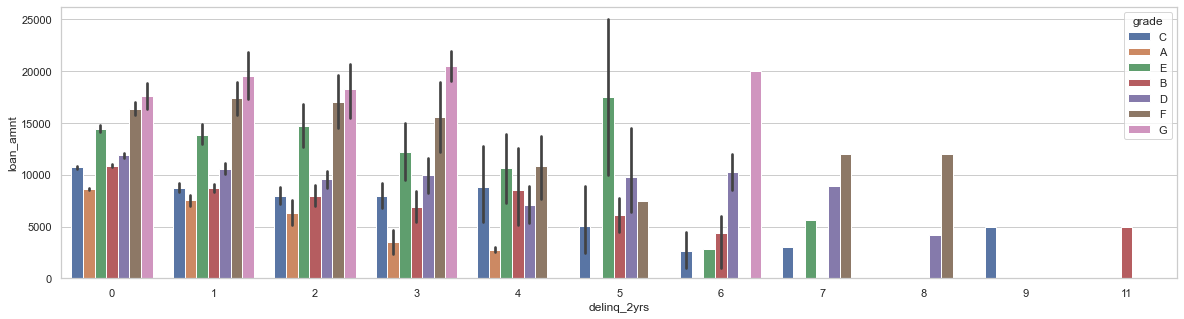

In [349]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies. 

####  delinq_2yr VS int_rate  VS loan_status

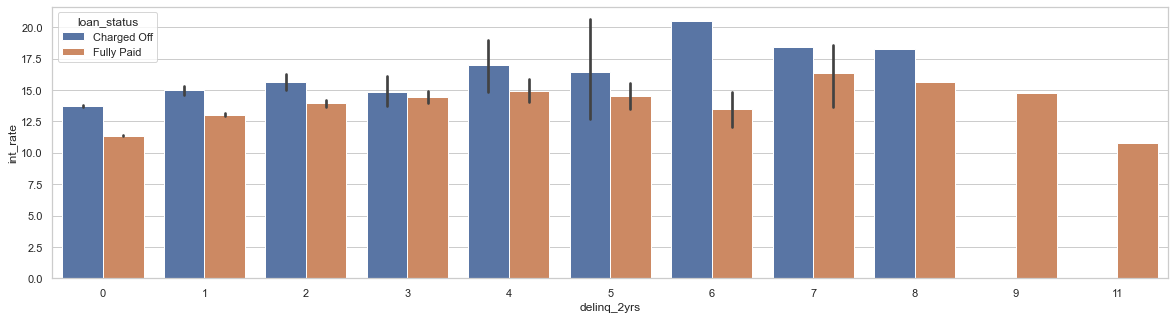

In [350]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
- In genral, intrest rate offered inceases with the number of deliquency of the borrower.

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


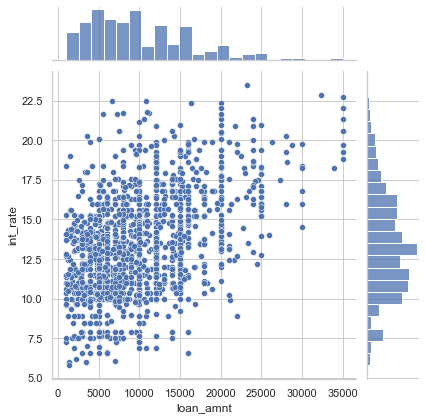

In [351]:
sns.jointplot('loan_amnt', 'int_rate', master_loan.loc[master_loan.pub_rec_bankruptcies > 0])

C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


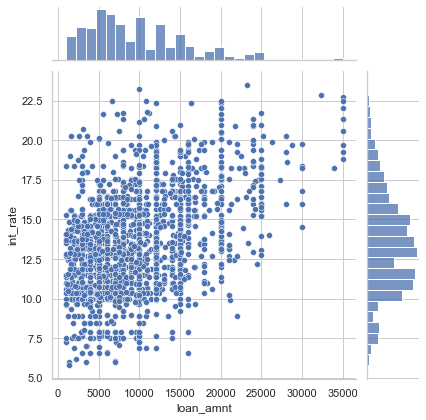

In [352]:
sns.jointplot('loan_amnt', 'int_rate', master_loan.loc[master_loan.pub_rec > 0])

In [353]:
master_loan[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.838641
pub_rec_bankruptcies,0.838641,1.000000


C:\Users\anjal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


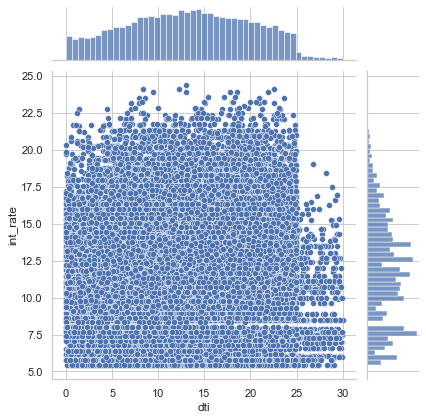

In [354]:
sns.jointplot('dti', 'int_rate', master_loan)